<a href="https://colab.research.google.com/github/prakayastha/Phonopy-Spectroscopy/blob/master/plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from scipy import constants, signal
from numpy import array, reshape, zeros, ones, linalg, identity, float64, append, sqrt, arange, newaxis, delete, sum
import copy, os, shutil
from sklearn import preprocessing
import numpy as np
import time
import sys
from pylab import figure
from pylab import savetxt, transpose, eig, argsort, sort, sign, pi, dot, sum, linspace, argmin, r_, convolve
def lorentz(pi,g,x):
    """
      Lorentzian function
    """
    x0 = (x.max()-x.min())-x.min()
    lr = ((g**2)/((x-0.5*x0)**2+g**2))
    return lr - lr.min()

broadening = 1

Text(0, 0.5, 'Intensity [a.u.]')

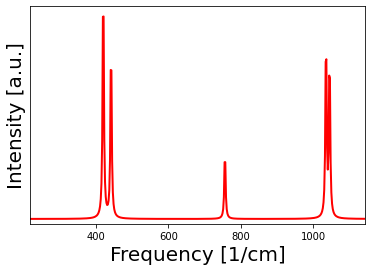

In [30]:
freq = np.array([127.691706,     127.691706,     300.321202,     351.617771,     404.654824,     418.134992,     440.688925,     440.688925,     740.678063,     754.161130,     754.161130,     1034.266948,     1043.616592,     1043.616592,     1093.200040])
infrared_intensity = np.array([0.015509, 0.015497, 0.000000, 0.000000, 0.000000, 1.276862, 0.932575, 0.932966, 0.000000, 0.361578, 0.361057, 0.965175, 0.855153, 0.855016, 0.000000])
x=linspace(freq.min()-500,freq.max()+500,1000)
z=zeros(len(x))
z2=zeros(len(x))

for i in range(len(freq)):
        z[argmin(abs(x-freq[i]))]=infrared_intensity[i]
window_len=150
lorentzian=lorentz(pi,broadening,arange(250))#signal.gaussian(window_len,broadening)
s=r_[z[window_len-1:0:-1],z,z[-1:-window_len:-1]]
z_convolve=convolve(lorentzian/lorentzian.sum(),s,mode='same')[window_len-1:-window_len+1]
fig=figure(0)
ax=fig.add_subplot(111)
ax.plot(x,z_convolve,'r',lw=2)
ax.set_xlim([freq.min()+90,freq.max()+50])
ax.set_ylim([-0.008,ax.get_ylim()[1]])
ax.set_yticks([])
ax.set_xlabel('Frequency [1/cm]',size=20)
ax.set_ylabel('Intensity [a.u.]',size=20)

#fig.savefig(name+'_IR_spectrum.pdf')

Text(0, 0.5, 'Intensity [a.u.]')

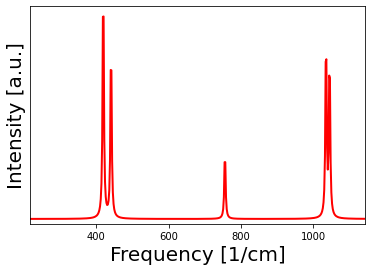

In [31]:
freq = np.array([127.62344912,                   127.62472229,                 300.40198063,                 351.59071827,                 404.68319517,                 418.12510063,                 440.75187960,                 440.75226537,                 740.64086067,                 754.11585713,                 754.11613728,                 1034.12847532,                 1043.46531950,                 1043.46541217,                 1093.07239928])
infrared_intensity = np.array([0.015509, 0.015497, 0.000000, 0.000000, 0.000000, 1.276862, 0.932575, 0.932966, 0.000000, 0.361578, 0.361057, 0.965175, 0.855153, 0.855016, 0.000000])
x=linspace(freq.min()-500,freq.max()+500,1000)
z=zeros(len(x))
z2=zeros(len(x))

for i in range(len(freq)):
        z[argmin(abs(x-freq[i]))]=infrared_intensity[i]
window_len=150
lorentzian=lorentz(pi,broadening,arange(250))#signal.gaussian(window_len,broadening)
s=r_[z[window_len-1:0:-1],z,z[-1:-window_len:-1]]
z_convolve=convolve(lorentzian/lorentzian.sum(),s,mode='same')[window_len-1:-window_len+1]
fig=figure(0)
ax=fig.add_subplot(111)
ax.plot(x,z_convolve,'r',lw=2)
ax.set_xlim([freq.min()+90,freq.max()+50])
ax.set_ylim([-0.008,ax.get_ylim()[1]])
ax.set_yticks([])
ax.set_xlabel('Frequency [1/cm]',size=20)
ax.set_ylabel('Intensity [a.u.]',size=20)